In [1]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics as diag
import numpy.ma as ma
import tracemalloc
from iosubdomains import Variable

In [28]:
exp_nonrot = diag.plume('../../data/Nyles/plume_4days_nonrot/', 'plume_4days_nonrot')
exp_rot = diag.plume('../../data/Nyles/plume_2days_pressure_4/', 'plume_2days_pressure_4')
time = exp.time/3600/24
r_lim = 0.3
z_lim = 0.6

In [19]:
#Ea = exp.Volume_integral('APE', r_lim, z_lim)
#Ea_winters = exp.Volume_integral('APE_winters', r_lim, z_lim)

In [20]:
#plt.plot(time, Ea_winters, label='$E_a$ winters')
#plt.plot(time, Ea, label='$E_a$')
#plt.legend()

We selected this parameters to be $r_{lim} = 0.3$ and $z_{lim} = 0.55$.

# Checking the energy reservoirs

In [21]:
Ek = exp.Volume_integral('KE', r_lim, z_lim)
#Ep = exp.Volume_integral('Ep', r_lim, z_lim)
Ea = exp.Volume_integral('APE', r_lim, z_lim)
Eb = exp.Volume_integral('Eb', r_lim, z_lim)

APE (193, 32, 64, 64)
globla shape (193, 32, 64, 64)


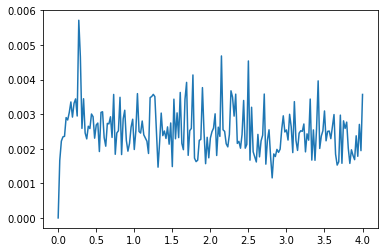

In [22]:
plt.plot(time, Ea, label='$E_a$')

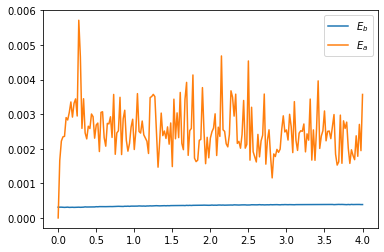

In [23]:
#plt.plot(time, Ek, label='$E_k$')
plt.plot(time, Eb, label='$E_b$')
plt.plot(time, Ea, label='$E_a$')
plt.legend()

In [37]:
heat_content_nonrot = exp_nonrot.Volume_integral('b', 0.45, 0.95)
heat_content_rot = exp_rot.Volume_integral('b', 0.45, 0.95)

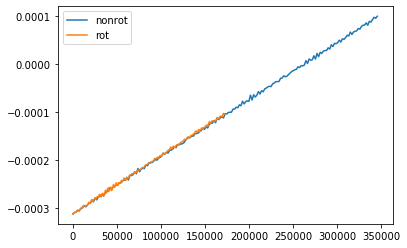

In [38]:
plt.plot(exp_nonrot.time, heat_content_nonrot, label='nonrot')
plt.plot(exp_rot.time, heat_content_rot, label='rot')
plt.legend()

In [14]:
b = Variable(exp.template, 'b')
br = b[:,:,0,0]

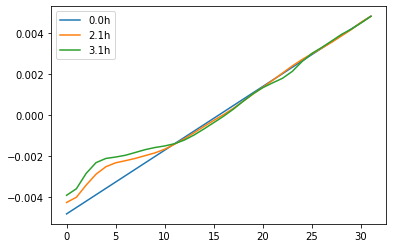

In [15]:
plt.plot(br[0], label=f'{time[0]:0.1f}h')
plt.plot(br[100], label=f'{time[100]:0.1f}h')
plt.plot(br[150], label=f'{time[150]:0.1f}h')
#plt.plot(b[100,:,31,31])
#plt.plot(b[100,:,30,30], label=f'b[30,63] @ {time[150]:0.1f}h')
plt.legend()

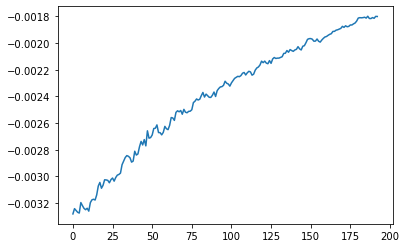

In [26]:
bb = b[:,5,:,:].copy()
plt.plot(np.mean(bb[:,20:-20,20:-20], axis=(1,2)))

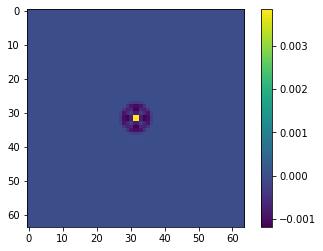

In [13]:
plt.imshow(b[2,0,:,:]-br[0])
plt.colorbar()

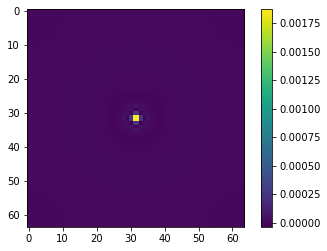

In [14]:
plt.imshow(b[2,5,:,:]-br[5])
plt.colorbar()

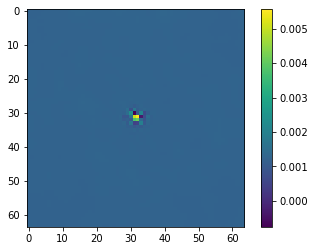

In [15]:
plt.imshow(b[-2,0,:,:]-br[0])
plt.colorbar()

In [16]:
ϕ_b2 = exp.buoyancy_forcing()

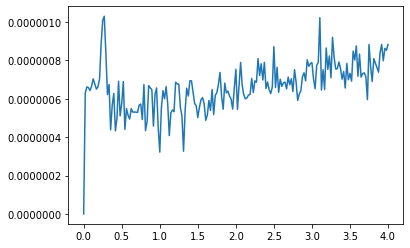

In [38]:
plt.plot(time, ϕ_b2)

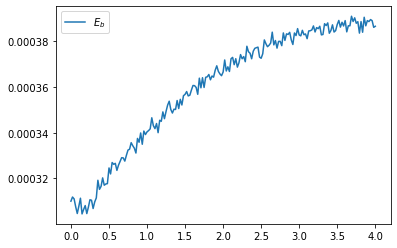

In [39]:
#plt.plot(time, Ep, label='$E_p$')
#plt.plot(time, Ea, label='$E_a$')
plt.plot(time, Eb, label='$E_b$')
plt.legend()

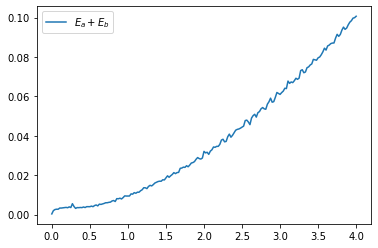

In [41]:
#plt.plot(time, Ep, label='$E_p$')
plt.plot(time, Ea + Eb, label='$E_a + E_b$')
#plt.plot(time, Ep, label='$E_p$')
plt.legend()

# Energy budget

![schematic](energy_budget_plume.png)

In [42]:
ϕ_E1 = exp.Lateral_flux('br_times_z', r_lim, z_lim)

In [43]:
ϕ_E2 = exp.Volume_integral('Q_times_z', r_lim, z_lim)

In [44]:
ϕ_E3 = exp.Lateral_flux('pr', r_lim, z_lim)

In [45]:
ϕ_E = ϕ_E1 + ϕ_E2 + ϕ_E3

Text(0.5, 0, 'Days')

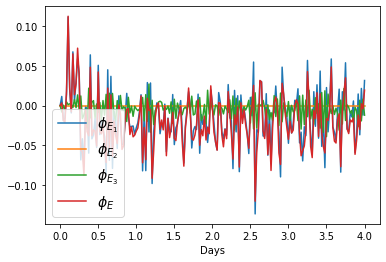

In [46]:
plt.plot(time, ϕ_E1, label='$\phi_{E_1}$')
plt.plot(time, ϕ_E2, label='$\phi_{E_2}$')
plt.plot(time, ϕ_E3, label='$\phi_{E_3}$')
plt.plot(time, ϕ_E, label='$\phi_{E}$')
plt.legend(fontsize=14)
plt.xlabel('Days')

## comparison between $\phi_{E_3}$ and $\overline{w'p'}$

In [47]:
wp = exp.Lid_flux('pr', 0.3, 0.55)

In [48]:
total_pr_flux = exp.Surface_flux('pr', 0.3, 0.55)

Text(0.5, 0, 'Days')

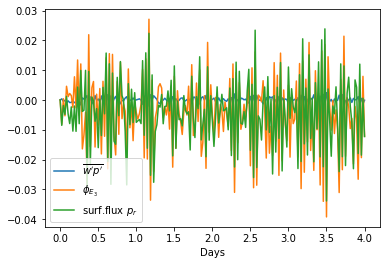

In [49]:
plt.plot(time, wp, label="$\overline{w'p'}$")
plt.plot(time, ϕ_E3, label="$\phi_{E_3}$")
plt.plot(time, total_pr_flux, label="surf.flux $p_r$")
plt.legend()
plt.xlabel('Days')

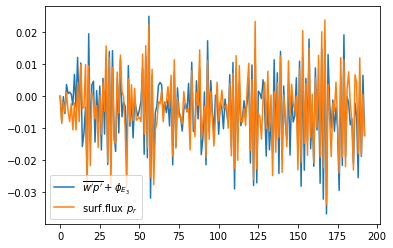

In [50]:
plt.plot(wp + ϕ_E3, label="$\overline{w'p'} + \phi_{E_3}$")
plt.plot(total_pr_flux, label="surf.flux $p_r$")
plt.legend()

## buoyancy_forcing 

In [51]:
ϕ_b2 = exp.buoyancy_forcing()

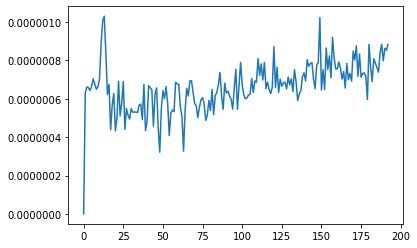

In [52]:
plt.plot(ϕ_b2)

## Buoyancy flux

In [53]:
ϕ_z = exp.Volume_integral('phi_z', r_lim, z_lim)

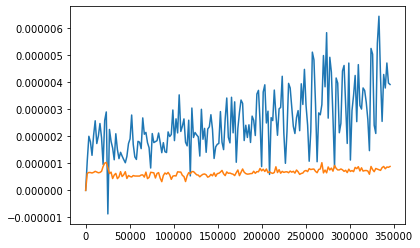

In [54]:
plt.plot(exp.time, ϕ_z)
plt.plot(exp.time, ϕ_b2)

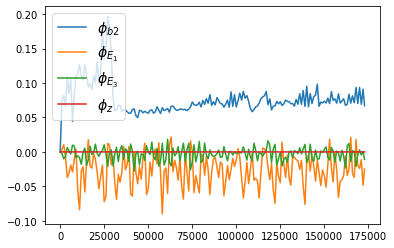

In [22]:
plt.plot(exp.time, ϕ_b2, label='$\phi_{b2}$')
plt.plot(exp.time, ϕ_E1, label='$\phi_{E_1}$')
plt.plot(exp.time, ϕ_E3, label='$\phi_{E_3}$')
plt.plot(exp.time, ϕ_z, label='$\phi_{z}$')
plt.legend(fontsize=14)

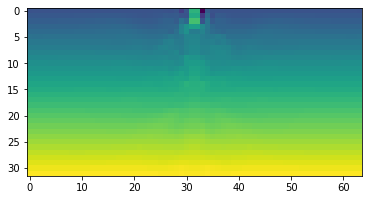

In [11]:
def stratif(z):
    return 1e-2*(z-0.5)

def z_r(b):
    return b/1e-2 + 0.5
b = exp.read_vars('b')['b']
aa = z_r(b)
plt.imshow(aa[10, :, :, 31])

In [17]:
b.max()*1000

5.171882308813348